In [9]:
import os
import sys
from pathlib import Path

# Notebook is in fraud_pipeline/notebooks, so project root is one level up
PROJECT_ROOT = Path.cwd().parents[0]
sys.path.append(str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)
print("Python path includes:", PROJECT_ROOT)


Project root: /Users/nithinchaganty/fraud_pipeline
Python path includes: /Users/nithinchaganty/fraud_pipeline


In [10]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots a bit nicer
plt.style.use("ggplot")

# Ensure we can import from src if needed later
BASE_DIR = Path(os.getcwd()).resolve().parents[0] if Path(os.getcwd()).name == "notebooks" else Path(os.getcwd())
print("Base directory:", BASE_DIR)


Base directory: /Users/nithinchaganty/fraud_pipeline


In [11]:
data_path = BASE_DIR / "data" / "raw" / "creditcard.csv"
df = pd.read_csv(data_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape, df.dtypes.head()

((284807, 31),
 Time    float64
 V1      float64
 V2      float64
 V3      float64
 V4      float64
 dtype: object)

Class counts:
Class
0    284315
1       492
Name: count, dtype: int64

Class proportions:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


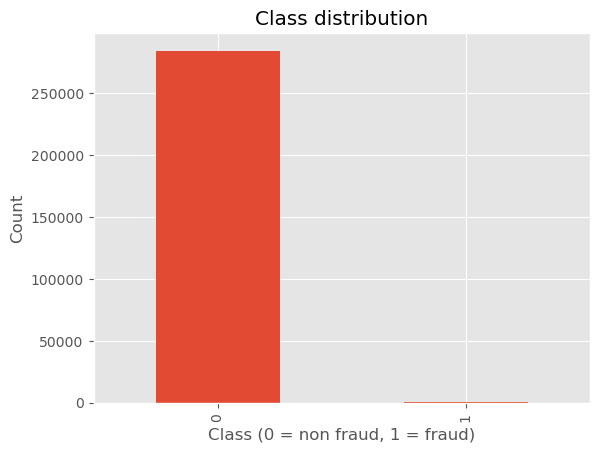

In [13]:
class_counts = df["Class"].value_counts()
class_ratio = df["Class"].value_counts(normalize=True)

print("Class counts:")
print(class_counts)
print("\nClass proportions:")
print(class_ratio)

class_counts.plot(kind="bar")
plt.xlabel("Class (0 = non fraud, 1 = fraud)")
plt.ylabel("Count")
plt.title("Class distribution")
plt.show()

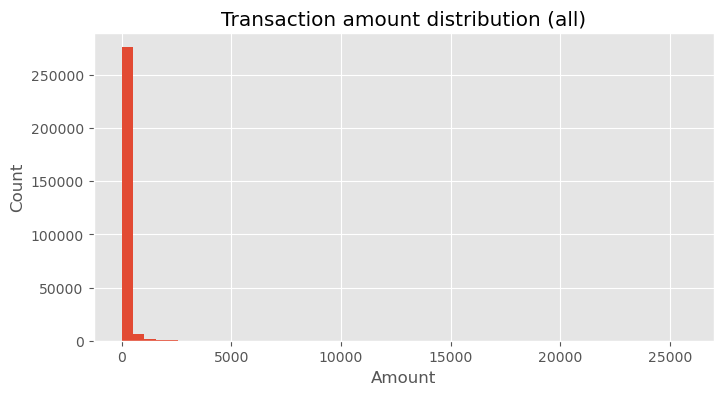

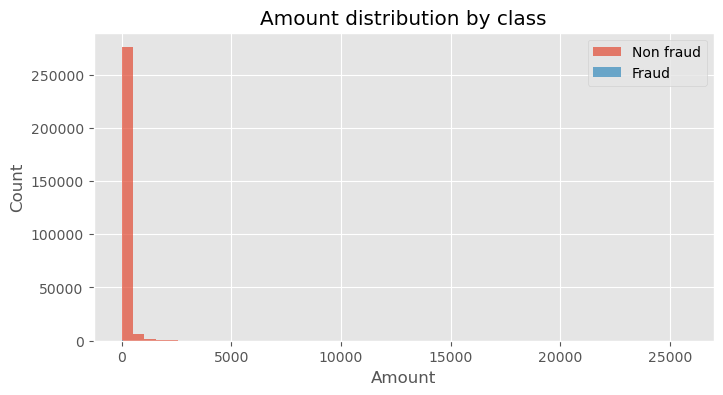

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(df["Amount"], bins=50)
plt.xlabel("Amount")
plt.ylabel("Count")
plt.title("Transaction amount distribution (all)")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(df[df["Class"] == 0]["Amount"], bins=50, alpha=0.7, label="Non fraud")
plt.hist(df[df["Class"] == 1]["Amount"], bins=50, alpha=0.7, label="Fraud")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.title("Amount distribution by class")
plt.legend()
plt.show()

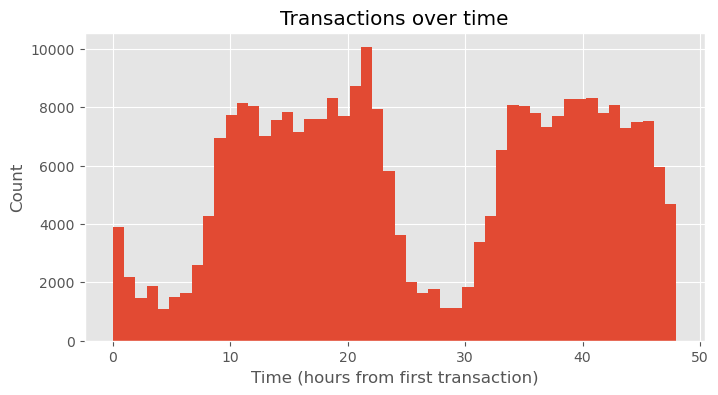

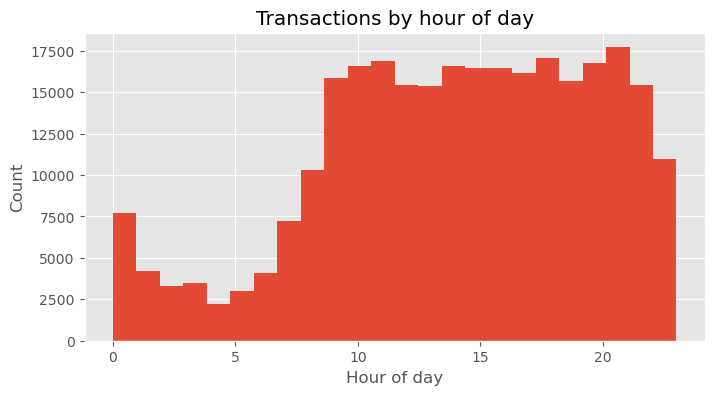

In [15]:
if "Time" in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df["Time"] / 3600, bins=50)
    plt.xlabel("Time (hours from first transaction)")
    plt.ylabel("Count")
    plt.title("Transactions over time")
    plt.show()

    df["hour"] = (df["Time"] // 3600) % 24
    plt.figure(figsize=(8, 4))
    df["hour"].hist(bins=24)
    plt.xlabel("Hour of day")
    plt.ylabel("Count")
    plt.title("Transactions by hour of day")
    plt.show()

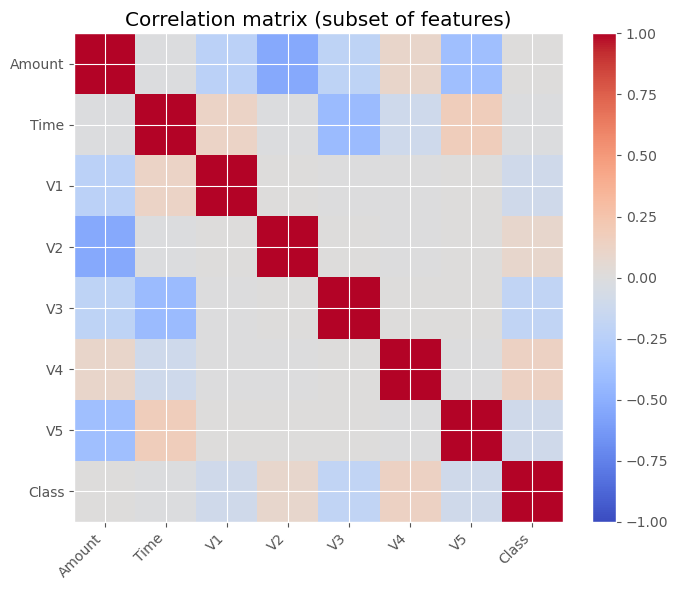

In [7]:
cols_subset = ["Amount", "Time"] + [f"V{i}" for i in range(1, 6)] + ["Class"]
corr = df[cols_subset].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(cols_subset)), cols_subset, rotation=45, ha="right")
plt.yticks(range(len(cols_subset)), cols_subset)
plt.title("Correlation matrix (subset of features)")
plt.tight_layout()
plt.show()